<a href="https://colab.research.google.com/github/richsharples/MIT-DS/blob/main/Reference_Notebook_Milestone_1_Time_Series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone 1**

##**Context**
 
 - Why is this problem important to solve?

##**Objective**

 - What is the intended goal?

##**Key questions**

- What are the key questions that need to be answered?

##**Problem Formulation**:

- What is it that we are trying to solve using data science?

##**Attributes Information:**

This datset is the past monthly data of Carbon dioxide emissions from electricity generation from the US Energy Information Administration categorized by fuel type such as Coal, Natural gas etc.

**MSN:-** Reference to Mnemonic Series Names (U.S. Energy Information Administration Nomenclature)

**YYYYMM:-** The month of the year on which these emissions were observed

**Value:-** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide

**Description:-**  Different category of electricity production through which carbon is emissioned.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###**Loading the libraries**

**Please note that we are downgrading the version of the statsmodels library to version 0.12.1.** Due to some variation, the latest version of the library might not give us the desired results. You can run the below code to downgrade the library and avoid any issues in the output. Once the code runs successfully, either restart the kernel or restart the Jupyter Notebook before importing the statsmodels library.It is enough to run the install statsmodel cell once.To be sure you are using the correct version of the library, you can use the code in the Version check cell of the model.

In [ ]:
#!pip install statsmodels==0.12.1

In [ ]:
# Version check 
import statsmodels
statsmodels.__version__

'0.10.2'

In [ ]:
#Import basic libraries
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dfname = '/content/drive/MyDrive/MIT-DataServices/Notebooks/Capstone/MER_T12_06.xlsx'

#dfname = 'MER_T12_06.xlsx'

df = pd.read_excel(dfname)

#df.head(15)

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSN          5094 non-null   object
 1   YYYYMM       5094 non-null   int64 
 2   Value        5094 non-null   object
 3   Description  5094 non-null   object
dtypes: int64(1), object(3)
memory usage: 159.3+ KB


In [ ]:
#to ignore warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

In [ ]:
#conversion of "YYYYMM" columnn into standard datetime format & making it as index
# We are using errors=’coerce’. It will replace all non-numeric values with NaN.

dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')

df = pd.read_excel(dfname, 
                parse_dates=['YYYYMM'],
                index_col='YYYYMM', 
                date_parser=dateparse) 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSN          5094 non-null   object
 1   Value        5094 non-null   object
 2   Description  5094 non-null   object
dtypes: object(3)
memory usage: 159.2+ KB


**The arguments can be explained as:**

- **parse_dates:** This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- **index_col:** This is a key that forces pandas to use the date time column as index.
- **date_parser:** Converts an input string into datetime variable.

- Let us first identify and **drop the non datetimeindex** rows. First, let's convert the index to datetime, coerce errors, and filter NaT

In [ ]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]

ts.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSN          4707 non-null   object
 1   Value        4707 non-null   object
 2   Description  4707 non-null   object
dtypes: object(3)
memory usage: 147.1+ KB


In [ ]:
#Check the datatypes of each column. Hint: Use dtypes method

ts.dtypes

MSN            object
Value          object
Description    object
dtype: object

In [ ]:
#convert the emision value into numeric value
 
ts['Value'] = pd.to_numeric(ts['Value'],errors = 'coerce')

ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSN          4707 non-null   object 
 1   Value        4323 non-null   float64
 2   Description  4707 non-null   object 
dtypes: float64(1), object(2)
memory usage: 147.1+ KB


In [ ]:
#Check total number of missing values of each column. Hint: Use isnull() method
ts.isnull().sum()

MSN              0
Value          384
Description      0
dtype: int64

In [ ]:
#Drop the missing value using dropna(inplace = True)
ts.dropna(inplace=True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSN          4323 non-null   object 
 1   Value        4323 non-null   float64
 2   Description  4323 non-null   object 
dtypes: float64(1), object(2)
memory usage: 135.1+ KB


###**Dataset visualization**

- The dataset has 8 energy sources of CO2 emission. 
- Group the CO2 Emission dataset based on the type of energy source.

In [ ]:
gts = ts.groupby('Description')

for name,group in gts:
    print(name,'contains',group.shape[0],'rows')

gts.head(15)

Coal Electric Power Sector CO2 Emissions contains 523 rows
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions contains 523 rows
Geothermal Energy Electric Power Sector CO2 Emissions contains 331 rows
Natural Gas Electric Power Sector CO2 Emissions contains 523 rows
Non-Biomass Waste Electric Power Sector CO2 Emissions contains 331 rows
Petroleum Coke Electric Power Sector CO2 Emissions contains 523 rows
Petroleum Electric Power Sector CO2 Emissions contains 523 rows
Residual Fuel Oil Electric Power Sector CO2 Emissions contains 523 rows
Total Energy Electric Power Sector CO2 Emissions contains 523 rows


,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions
...,...,...,...
1973-11-01,TXEIEUS,103.624,Total Energy Electric Power Sector CO2 Emissions
1973-12-01,TXEIEUS,105.089,Total Energy Electric Power Sector CO2 Emissions
1974-01-01,TXEIEUS,105.530,Total Energy Electric Power Sector CO2 Emissions


####**Visualize the dependency of the emission in the power generation with time.**

In [ ]:
# Note these reflect the order they appear in the data file
cols = ['Coal', 
        'Distillate Fuel ',
        'Geothermal Energy', 
        'Natural Gas', 
        'Non-Biomass Waste', 
        'Petroleum Coke',
        'Petroleum', 
        'Residual Fuel Oil', 
        'Total Emissions']

No handles with labels found to put in legend.


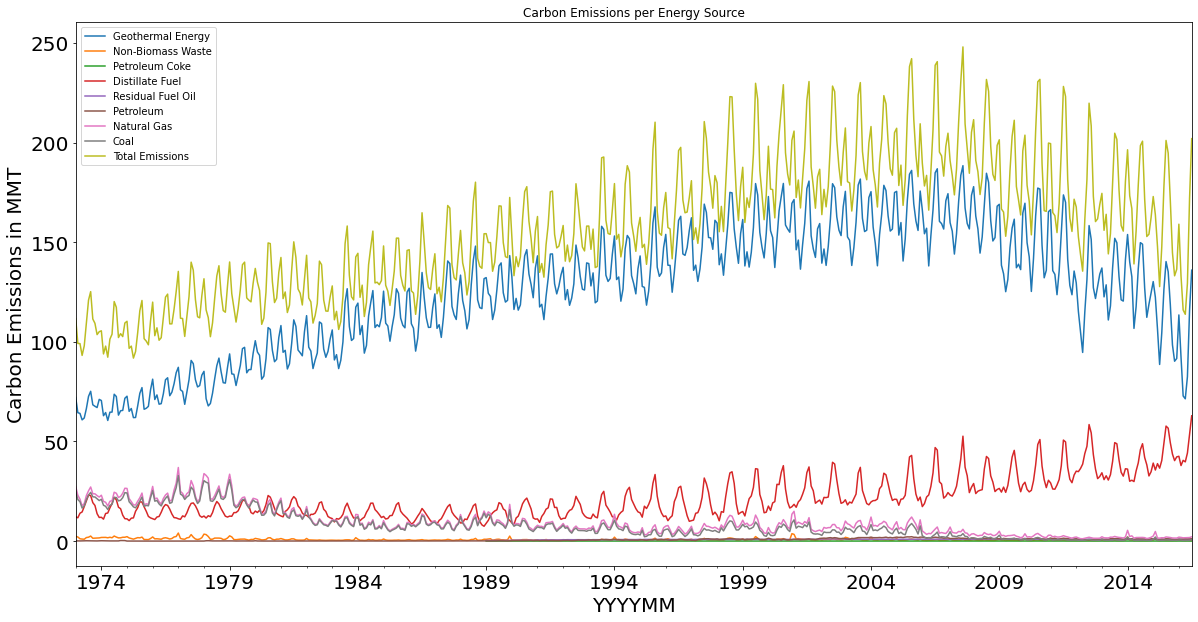

In [ ]:
## Code here

fig, ax = plt.subplots(figsize = (20, 10))

ax.set_xlabel('Time(Monthly)')
ax.set_ylabel('Carbon Emissions in MMT')

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.legend(fontsize = 15)

colindex=0

for desc, group in gts:
    group.plot(y='Value', use_index=True, label=cols[colindex],ax=ax,title='Carbon Emissions per Energy Source', fontsize = 20)
    colindex=colindex+1

- **Observations and Insights: **

There is clear evidence of both seasonality (likely winter heating fuel usage) and long term trends - eg. decline coal and oil derivitives and increase in natural gas, non-biomass waste and geothermal

#### **Visualize the trend of CO2 emission from each energy source individually**

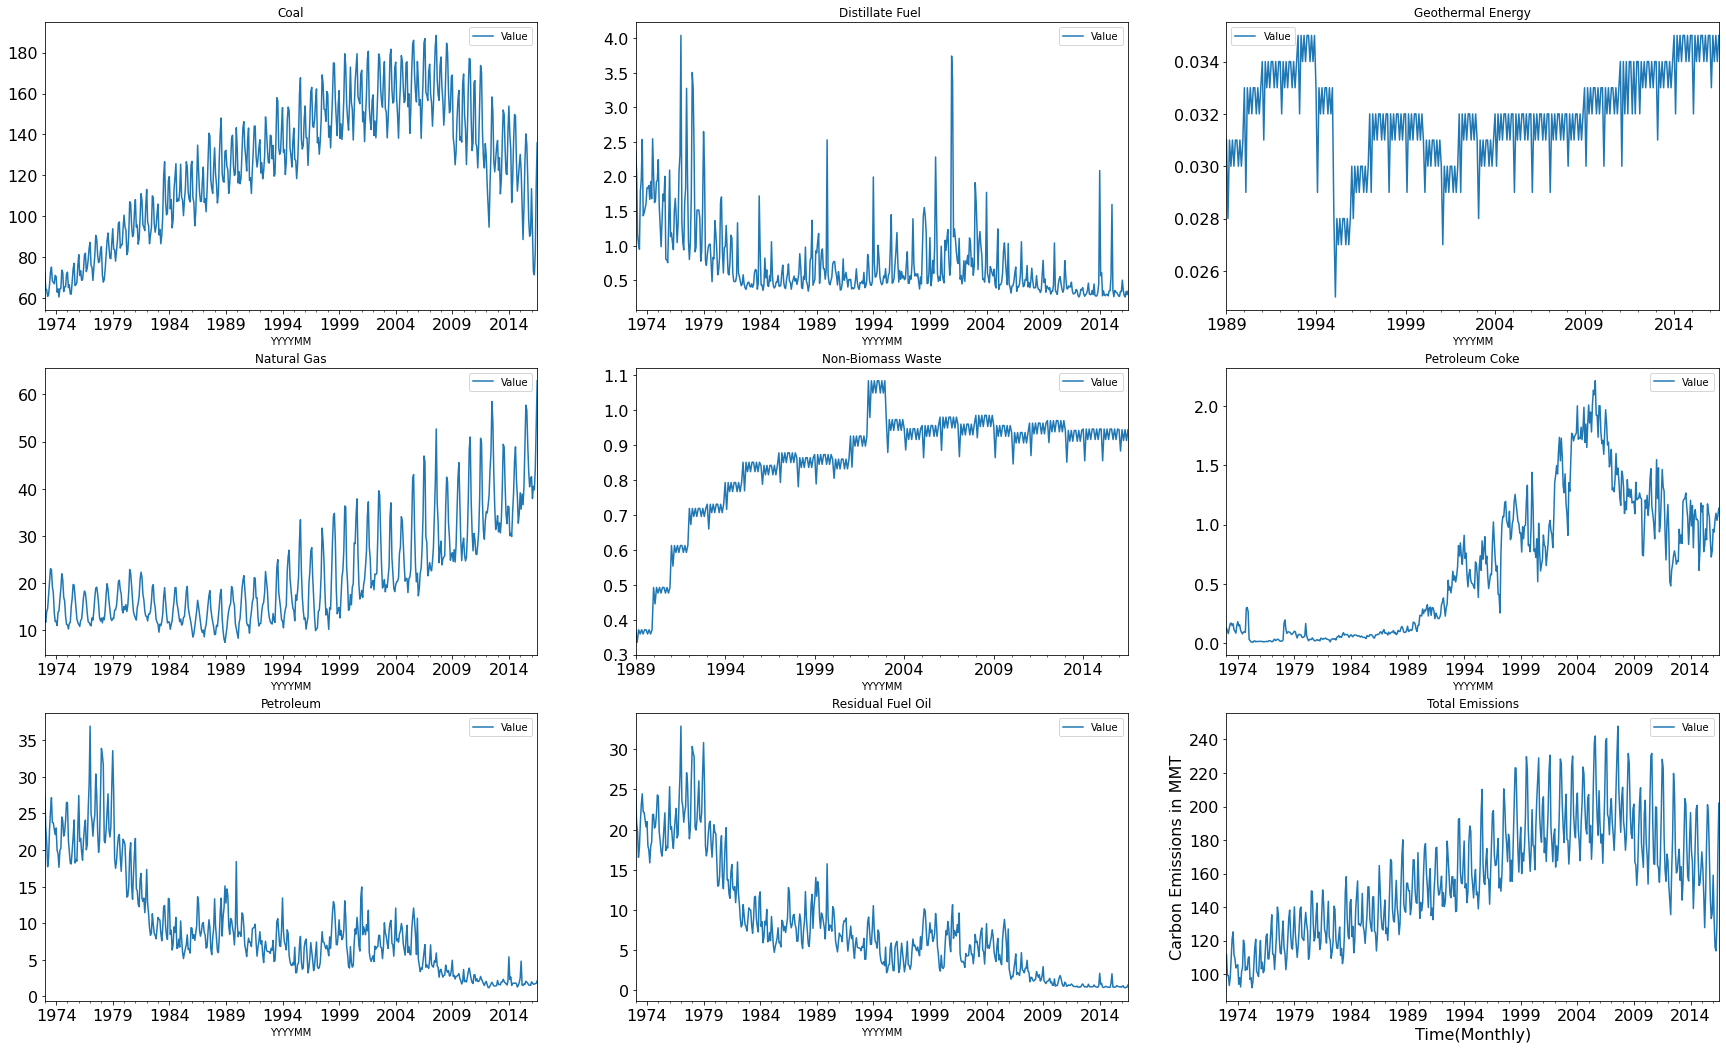

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (30, 18))
colindex=0

for (desc, group), ax in zip(gts, axes.flatten()):
    group.plot(y='Value',use_index=True, ax = ax, title=cols[colindex], fontsize = 16)
    colindex = colindex+1
    
ax.set_xlabel('Time(Monthly)')
ax.set_ylabel('Carbon Emissions in MMT')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

#### **Observations and Insights: **

Total emmission are declining - driven by lower emissions from all sources with the exception of natural gas, non-biomass waste, and geothermal

####**Bar chart of CO2 Emissions per energy source**

In [ ]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [ ]:
# Note these are ordered by MMT

cols = ['Geothermal Energy', 
        'Non-Biomass Waste', 
        'Petroleum Coke',
        'Distillate Fuel ',
        'Residual Fuel Oil', 
        'Petroleum', 
        'Natural Gas', 
        'Coal', 
        'Total Emissions']

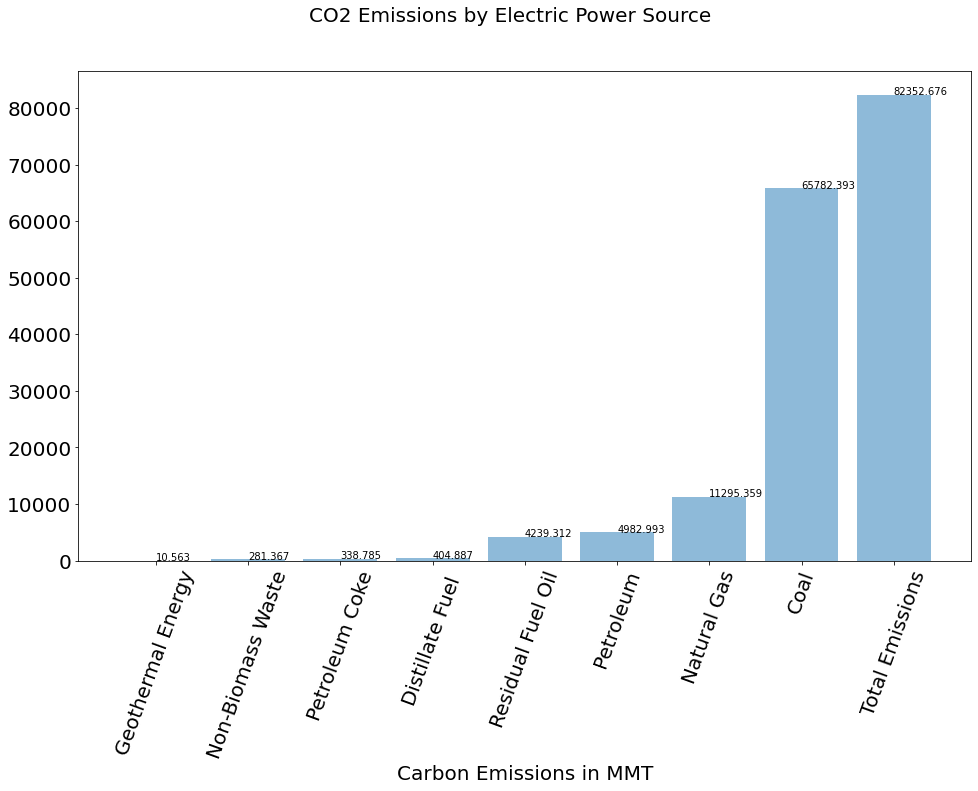

In [ ]:
##Code here

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
addlabels(x_tick,CO2_per_source)
fig.suptitle("CO2 Emissions by Electric Power Source", fontsize=20)
plt.xticks(x_tick, x_label, rotation = 70, fontsize=20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize=20)
plt.show()

####**For developing the time series model and forcasting, use the natural gas CO2 emission from the electirical power generation**


In [ ]:
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
print ( mte.count())
print (mte.head())
print (mte.tail())
print (mte.describe())


523
YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
count    523.000000
mean      21.597245
std       10.585556
min        7.448000
25%       13.427500
50%       18.459000
75%       27.076500
max       62.881000
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64


####**Observations & insights: **

There are 523 monthly samples for Natural Gas between January 1973 and July 2016. There are no missing samples. The mean is 21.6 MMT and an upward trend.

##**Proposed approach**

Please see associated document - Capstone_1_Sharples